In [1]:
from google.colab import files
a=files.upload()

Saving #2 Forecasting Air Passengers.csv to #2 Forecasting Air Passengers (1).csv


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/#2 Forecasting Air Passengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.shape

(144, 2)

In [6]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

# Multiplicative Decomposition

Text(0.5, 0.98, '\nMultiplicative Decompose')

<Figure size 1440x576 with 0 Axes>

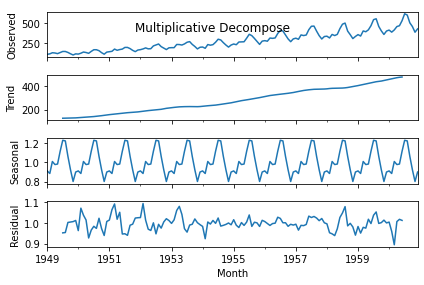

In [25]:
mul_d=seasonal_decompose(df['#Passengers'], model='multiplicative')
plt.figure(figsize=(20,8))
mul_d.plot().suptitle('\nMultiplicative Decompose')

# Additive decompose

Text(0.5, 0.98, '\nAdditive Decompose')

<Figure size 1440x576 with 0 Axes>

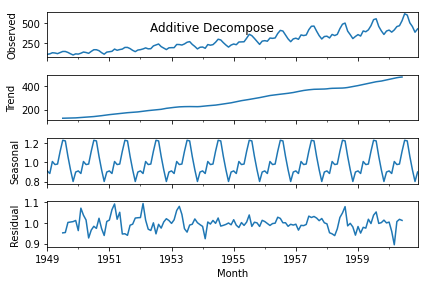

In [26]:
add_d=seasonal_decompose(df['#Passengers'], model='additive')
plt.figure(figsize=(20,8))
mul_d.plot().suptitle('\nAdditive Decompose')

Creating the 'Date' as Index for data and viewing the dataset

In [7]:
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
df=df.set_index(['Month'])
print(df.head())
print(df.tail())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
            #Passengers
Month                  
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432


Visualizing the Time Series plot for the number of Air Passengers


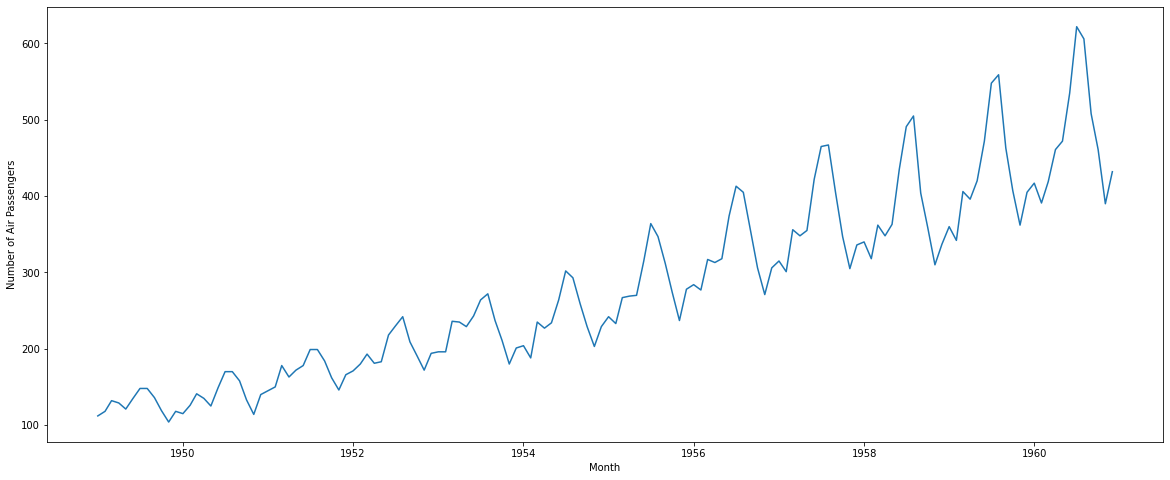

In [13]:
plt.figure(figsize=(20,8))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)


We need the time series to be stationary for which we need the mean and variance of the series to be constant that is not changing over time (practically there will be small difference but we cannot have a huge difference,


*   Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series




In [9]:
rolmean=df.rolling(window=10).mean()
print(rolmean.head(15))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01        129.8
1949-11-01        129.0
1949-12-01        129.0
1950-01-01        127.3
1950-02-01        127.0
1950-03-01        129.0


In [10]:
rolstd=df.rolling(window=10).std()
print(rolstd.head(15))

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01    12.398925
1949-11-01    13.848385
1949-12-01    13.848385
1950-01-01    14.468740
1950-02-01    14.460675
1950-03-01    14.914572


# Plotting the Rolling Mean and Standard Deviation, which has window of 10

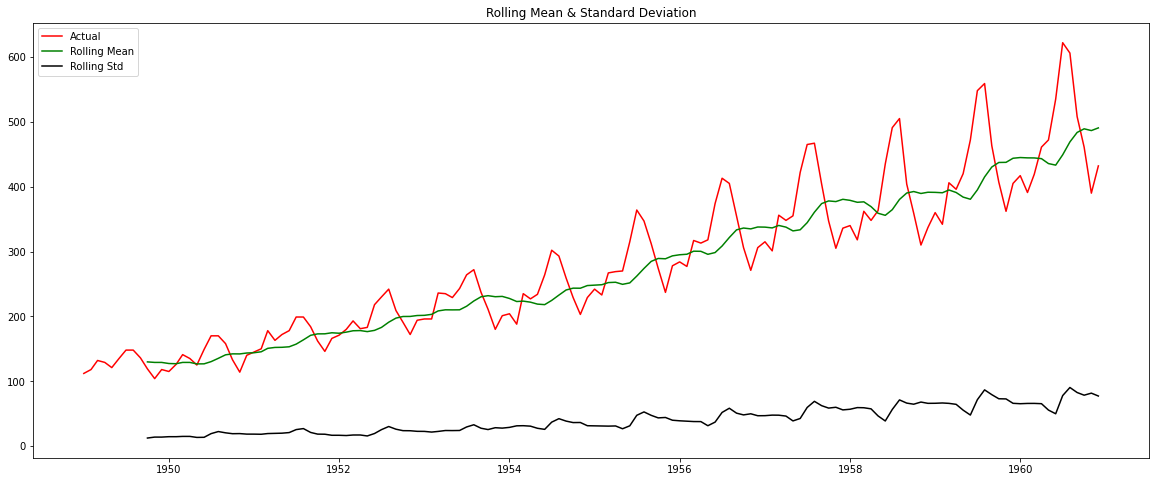

In [12]:
plt.figure(figsize=(20,8))
actual=plt.plot(df, color='red', label='Actual')
mean_r=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_r=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

we conclude from the above graph that, it is non-stationary bcoz mean and variance is not constant

# Using ADF  to check stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(df['#Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

# log transformation to make our Time series stationary

In [17]:
df_log=np.log(df)
print(df_log)

            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]


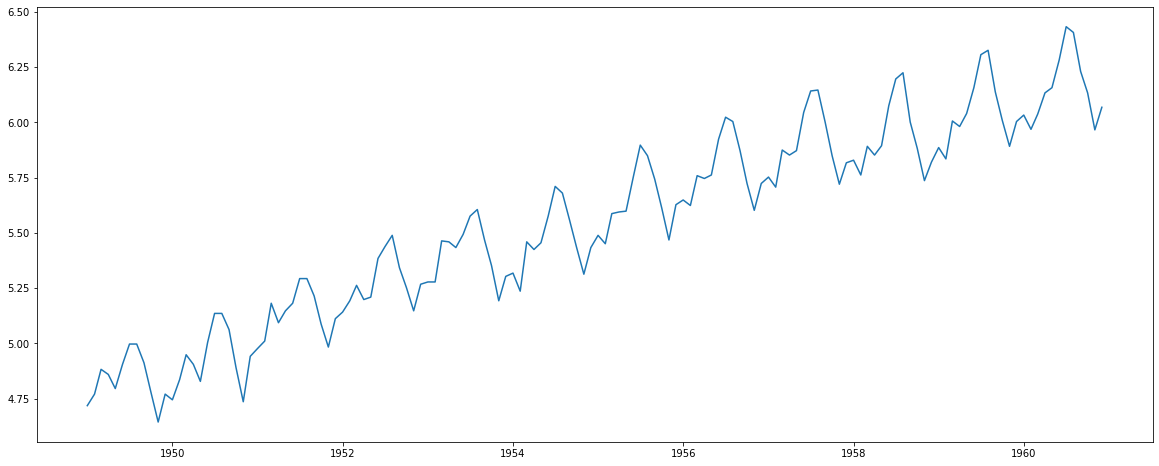

In [18]:
plt.figure(figsize=(20,8))
plt.plot(df_log)

found graph to be  upward trending over time with seasonality

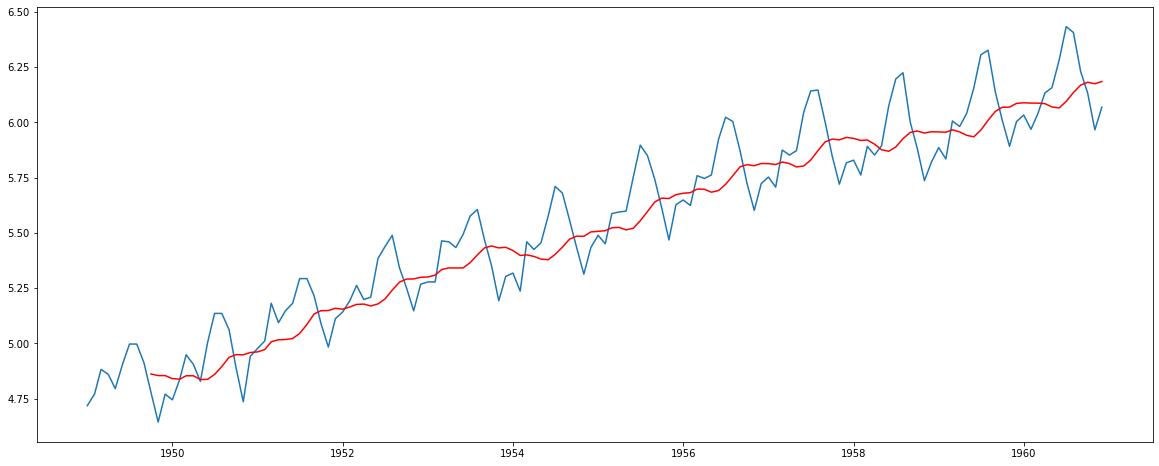

In [19]:
plt.figure(figsize=(20,8))
MAvg=df_log.rolling(window=10).mean()
MStd=df_log.rolling(window=10).std()
plt.plot(df_log)
plt.plot(MAvg, color='red')

# Differencing method to make time series staionary

In [27]:
df_log_diff=df_log-MAvg
df_log_diff.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


dropping null values from above dataframe

In [28]:
df_log_diff=df_log_diff.dropna()
df_log_diff.head()

,#Passengers
Month,
1949-10-01,-0.082783
1949-11-01,-0.210105
1949-12-01,-0.083811
1950-01-01,-0.095777
1950-02-01,-0.002074


# Again checking the stationarity 

In [31]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_r=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_r=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

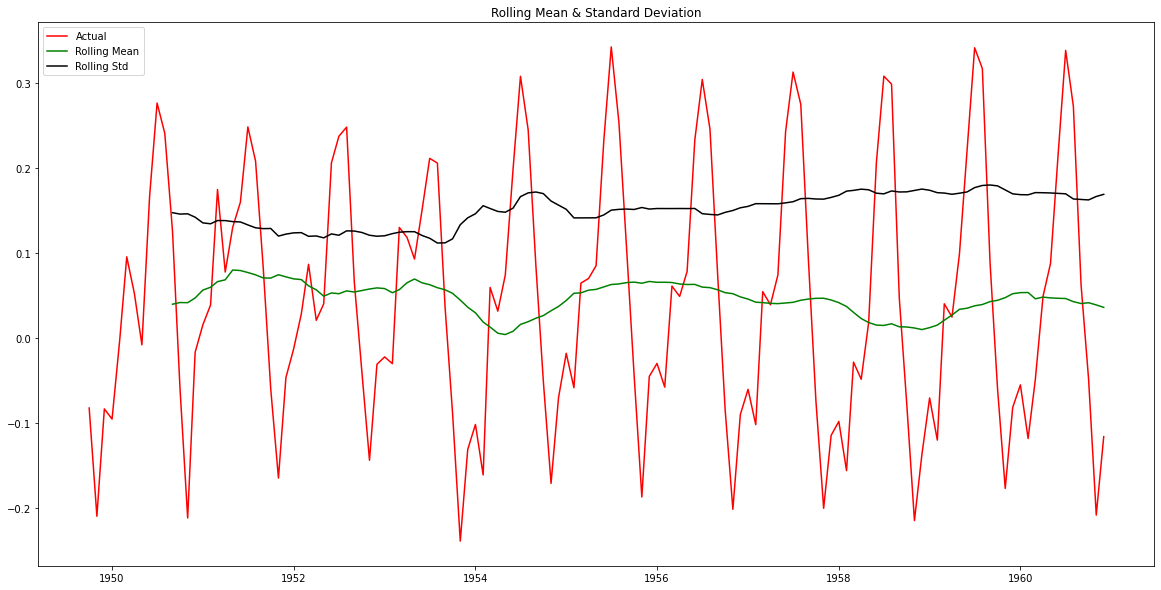

Dickey-Fuller Test: 
Test Statistic           -3.183441
p-value                   0.020963
Lags Used                13.000000
No. of Obs              121.000000
Critical Value (1%)      -3.485585
Critical Value (5%)      -2.885739
Critical Value (10%)     -2.579676
dtype: float64


In [32]:
stationarity(df_log_diff)

From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 

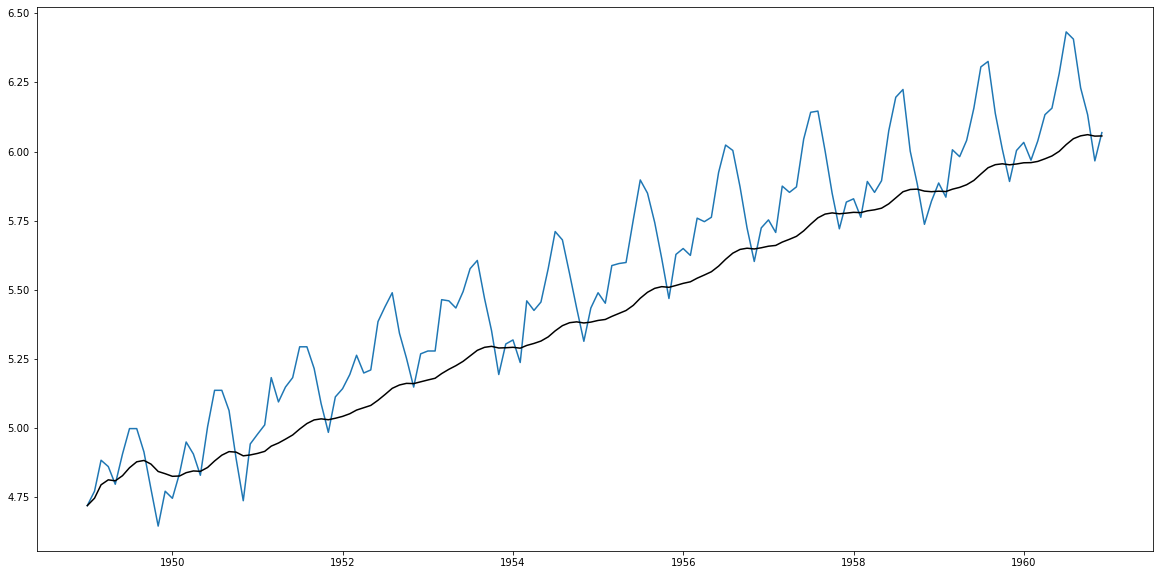

In [34]:
plt.figure(figsize=(20,10))
exp_df=df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_log)
plt.plot(exp_df, color='black')

log transformation is non-stationary

# applying differencing on the data

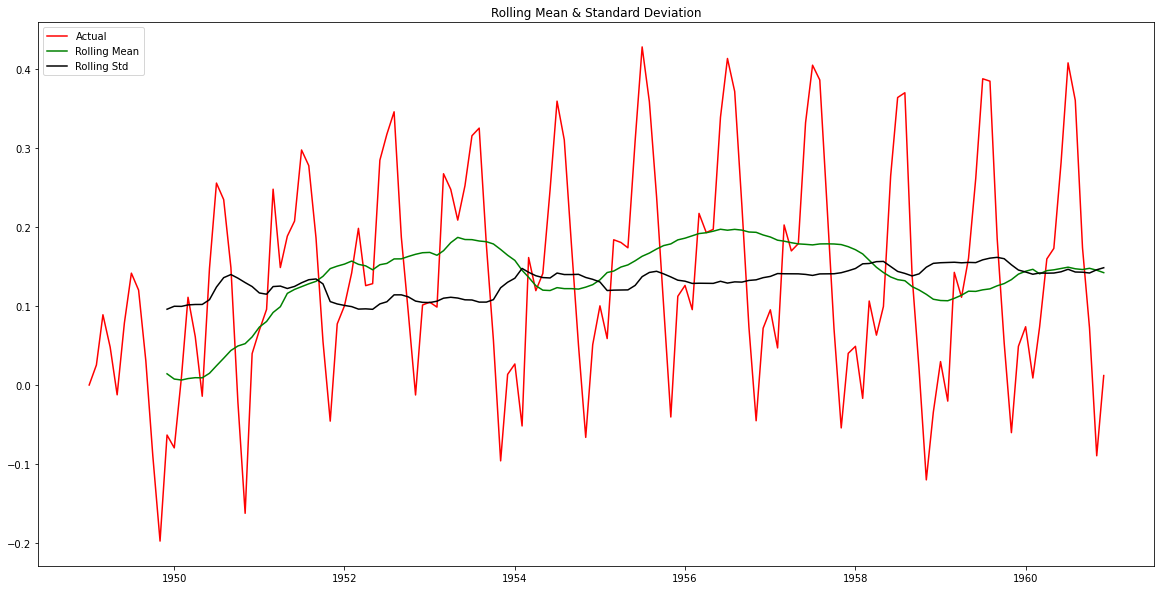

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [35]:
exp_df_diff=df_log-exp_df
stationarity(exp_df_diff)

From above graph and ADF test, we conclude, it is stationary

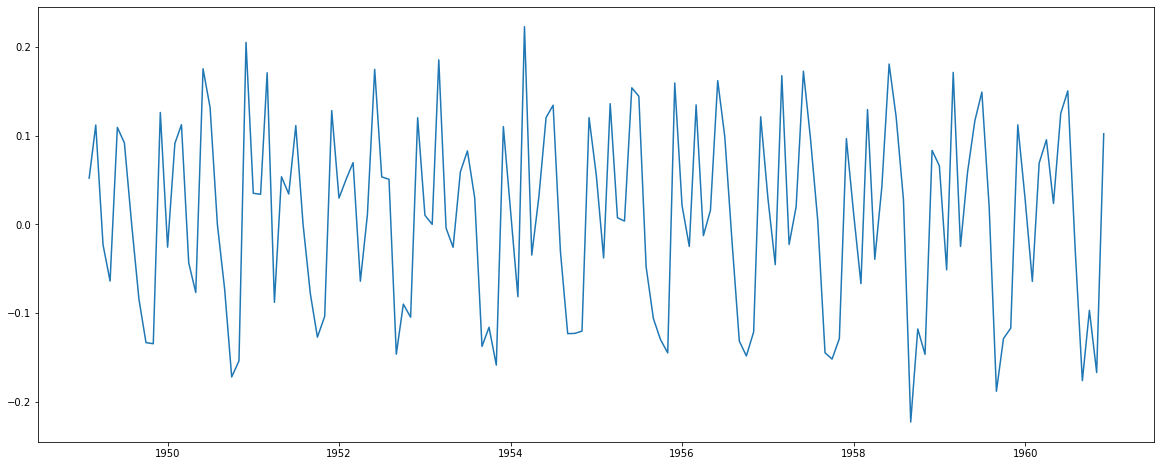

In [36]:
plt.figure(figsize=(20,8))
df_shift=df_log-df_log.shift()
plt.plot(df_shift)

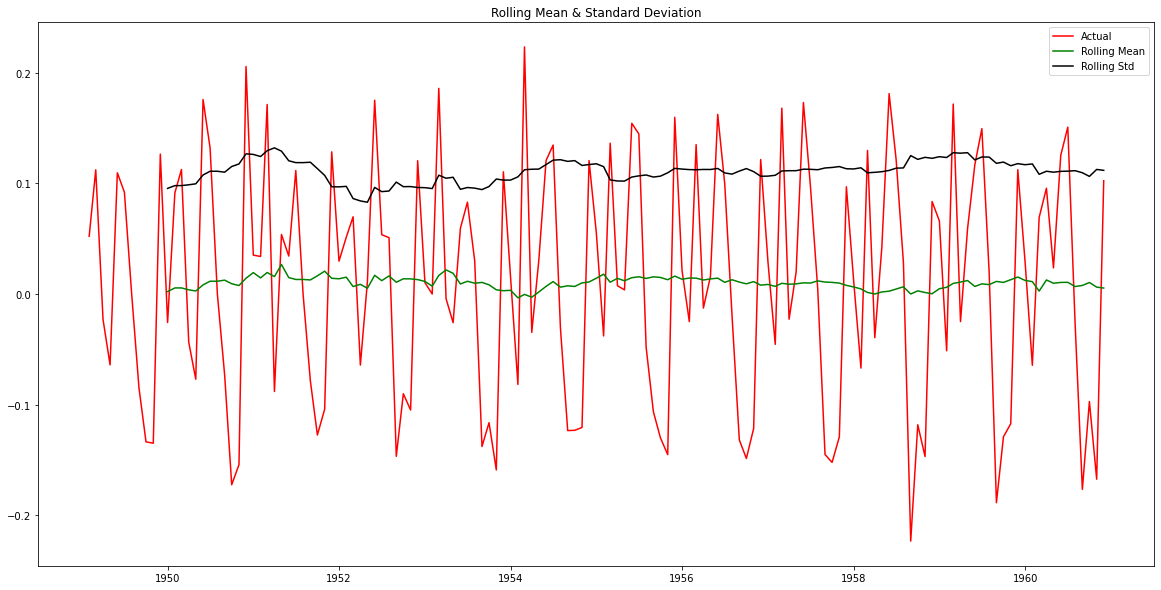

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [37]:
df_shift=df_shift.dropna()
stationarity(df_shift)

Text(0.5, 1.0, 'Partial Autocorrelation Function')

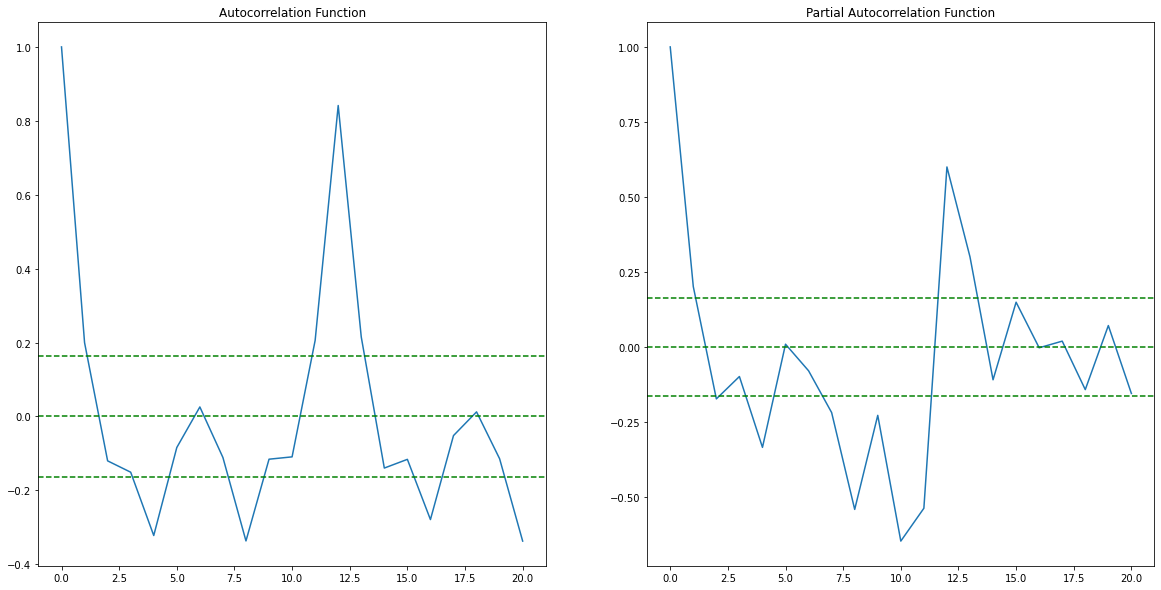

In [38]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(df_shift, nlags=20)
lag_pacf=pacf(df_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(df_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

plotting ARIMA model


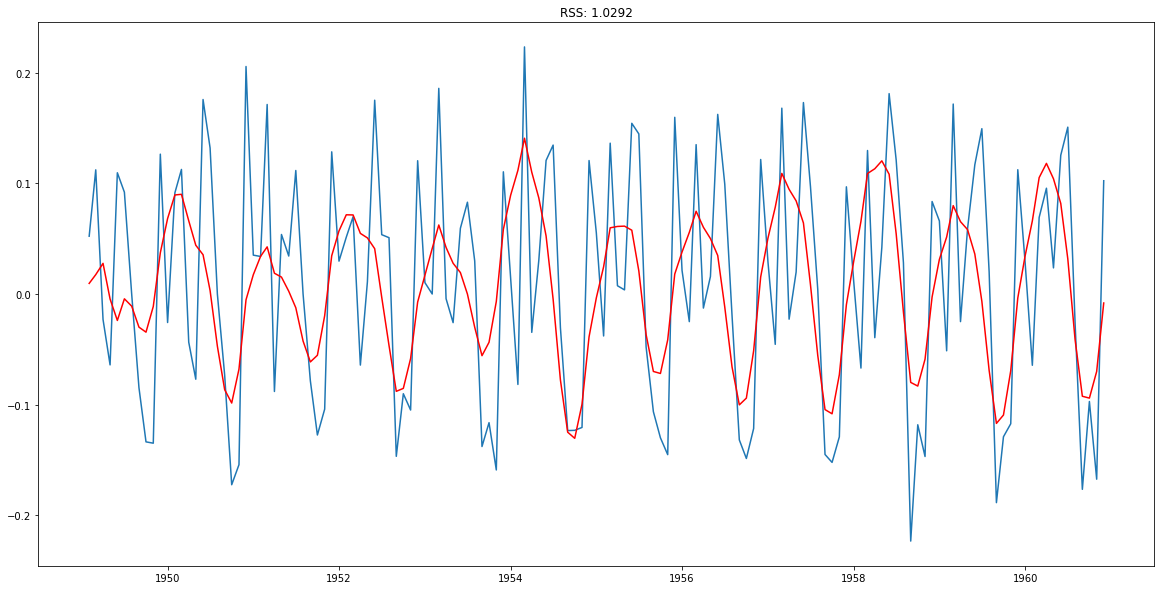

In [39]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(df_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(df_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-df_shift['#Passengers'])**2))
print('plotting ARIMA model')

In [40]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [41]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [45]:
predictions_log=pd.Series(df_log['#Passengers'], index=df_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

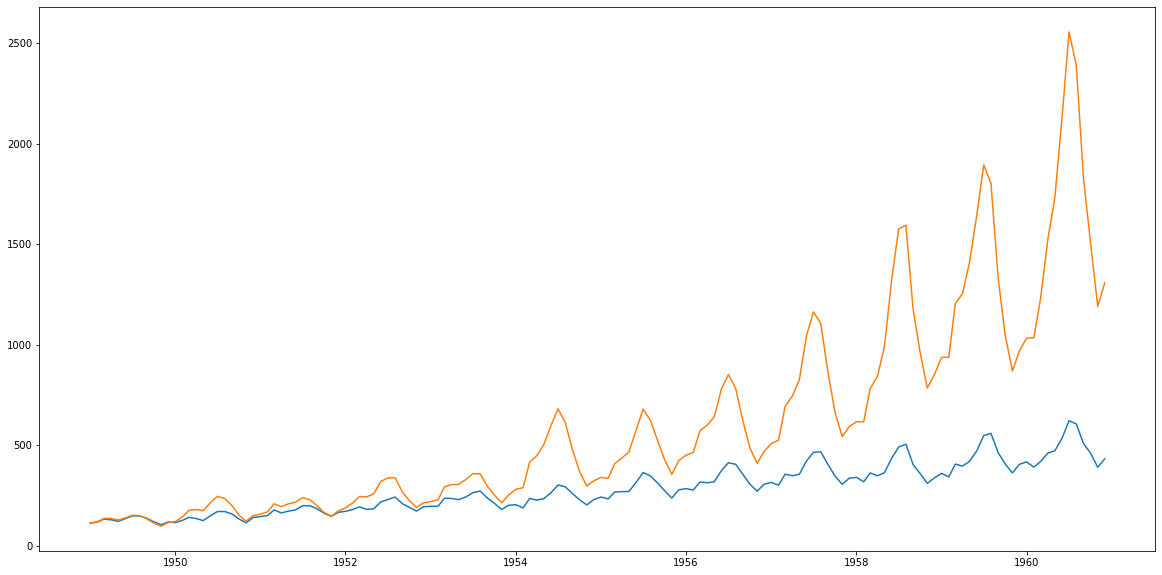

In [46]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(df)
plt.plot(predictions_ARIMA)

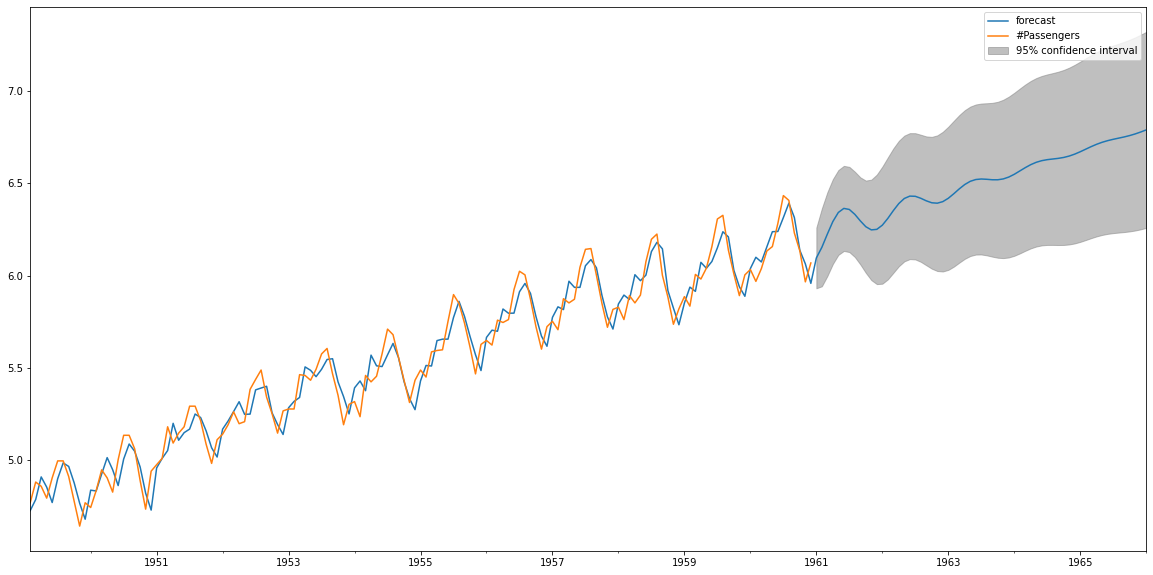

In [47]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [48]:
np.exp(x[0])

array([ 443.8710291 ,  470.03831925,  504.93507071,  540.45486681,
        567.73068978,  580.32802578,  577.00253752,  561.93873361,
        542.38454039,  525.56667614,  516.65910969,  518.14330147,
        529.93721722,  549.7168306 ,  573.36071722,  595.78899491,
        612.33145521,  620.2424088 ,  619.59541409,  613.03665216,
        604.59659546,  598.26640301,  596.94853229,  601.96250633,
        612.98291699,  628.26006331,  645.0800468 ,  660.46216657,
        671.98841756,  678.5038861 ,  680.3964569 ,  679.34137852,
        677.65968268,  677.58629088,  680.698378  ,  687.61130015,
        697.9369722 ,  710.4621344 ,  723.50186055,  735.36382445,
        744.8125667 ,  751.39217778,  755.4985045 ,  758.18788879,
        760.81244779,  764.62068564,  770.44256317,  778.52296242,
        788.51649239,  799.624757  ,  810.83638015,  821.21010959,
        830.12582042,  837.43176598,  843.44783979,  848.83409988,
        854.37758442,  860.76881215,  868.42990312,  877.43097

In [50]:
import pickle
pickle.dump(results,open('model.pkl','wb'))
n=int(input('Enter Number Of Months For Forcasting: '))
x=results.forecast(steps=n)
values=round(pd.DataFrame(np.exp(x[0]),columns=['Forecast']))
print('Forecast For Months: ')
values


Enter Number Of Months For Forcasting: 12
Forecast For Months: 


,Forecast
0,444.0
1,470.0
2,505.0
3,540.0
4,568.0
5,580.0
6,577.0
7,562.0
8,542.0
9,526.0
